# Analyse des données

## Set up

### Mise en place de l'environnement

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import missingno as msno 
import re

import sys
sys.path.insert(0, "/home/apprenant/PycharmProjects/open-food-facts")




In [28]:
# On veut pouvoir voir toutes les colonnes et toutes les lignes des dataframes
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)

### Import des données

On importe le fichier csv en précisant que le séparateur est une tabulation (tsv).

In [29]:
df = pd.read_csv("/home/apprenant/Downloads/openfoodfacts.tsv", sep='\t', low_memory=False)

## Etat des lieux

### Informations globales sur la table

In [30]:
print(df.head())  # Display the 5 first rows

            code                                                url  \
0  0000000003087  http://world-en.openfoodfacts.org/product/0000...   
1  0000000004530  http://world-en.openfoodfacts.org/product/0000...   
2  0000000004559  http://world-en.openfoodfacts.org/product/0000...   
3  0000000016087  http://world-en.openfoodfacts.org/product/0000...   
4  0000000016094  http://world-en.openfoodfacts.org/product/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957 

In [31]:
print("Nombre de lignes :", len(df.index))  # Display the number of rows

Nombre de lignes : 356027


In [32]:
print("Nombre de colonnes :", len(df.columns))  # Display the number of rows

Nombre de colonnes : 163


In [33]:
print(df.dtypes)  # Display column names and types

code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_en                                  object
origins                                        object
origins_tags                

In [34]:
print(list(df.columns.values))

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 'allergens_en', 'traces', 'traces_tags', 'traces_en', 'serving_size', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk', 'nutrition_grade_fr', 'pnns_groups_1', 

## Classification et analyse de la donnée

Nous allons regrouper les différentes colonnes par groupe qui auront par la suite un traitement similaire. Il y a 163 colonnes à analyser. On veut garder principalement ce qui permet de calculer le n 

### Les métadonnées 

Les métadonnées donnent des informations sur la création et les modifications de chaque ligne. Elles ne nous seront pas utiles et seront éliminées lors du nettoyage.
Les colonnes en question sont : 
'code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime'

### Les informations logistiques

Ces colonnes nous donnent des informations sur l'origine et la dénomination du produit. On va en conserver certaines. Pour cela voyons ce qu'elles contiennent dans un échantillon de la table

'product_name', 'generic_name', 'quantity',
 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
 'categories_tags', 'categories_en', 'origins', 'origins_tags',
 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags',
 'labels_en', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo',
 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries',
 'countries_tags', 'countries_en', 'pnns_groups_1', 'pnns_groups_2', 'main_category', 'main_category_en'

In [35]:
print(df[['product_name', 'generic_name', 'quantity',
 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
 'categories_tags', 'categories_en', 'origins', 'origins_tags',
 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags',
 'labels_en', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo',
 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries',
 'countries_tags', 'countries_en', 'pnns_groups_1', 'pnns_groups_2',
 'main_category', 'main_category_en']].sample(n=30))


                                             product_name  \
348106                              Glace Satisfy my bowl   
354003                                                NaN   
287819                                            Schmand   
264948                     Farine bio pour pain d'epautre   
84100                                        Cheese Pizza   
270634                         Crème Dessert à La Vanille   
318775                                   Rösti tout prêts   
197223                      Magret de Canard du Sud-Ouest   
307495                                   Chocolat au lait   
259886                             Compote Pomme Pruneaux   
324032                                  Bâtonnets de tofu   
253528                                             Surimi   
154724         Pasta Chips, Pasta Snack, Garlic Olive Oil   
223633                                 Cappuccino nature    
116392   Sticks Wafer Bars, Milk Chocolate, Peanut Butter   
31251      Fat Free Half

Les colonnes à conserver sont :
- product_name qui est le nom du produit qu'on veut présenter à l'utilisateur
- brands qui est le nom des marques pour permettre à l'utilisateur de spécifier la marque souhaitée dans sa recherche
- countries_en qui regroupe les pays de manière normalisée pour limiter nos données aux produits vendus en France (countries_tags aurait fait la même chose, countries a des dénominations variables pour la France)
- pnns_groups_1 qui donne le type de produit, cette colonne sera utile pour calculer le nutriscore manquants. En effet, cette valeur dépend de si le produit est un liquide (Beverages) ou un solide. On pourra la supprimer après avoir déterminé les nutriscores manquants de cette façon. 
 
Les colonnes finissant par tags contiennent la même chose que les colonnes du même nom, la seule différence étant qu'elles sont écrites en miniscules. Je choisis donc de ne pas les conserver. Je ne conserve pas non plus les autres colonnes de cette catégorie qui ne seront pas utiles par la suite. 

### Les informations nutritionnelles textuelles

Les informations nutritionnelles sont les informations recherchées par l'utilisateur. On va donc conserver les plus pertinentes, en éliminant par les colonnes redondantes ou non pertinentes. On éliminera les colonnes redondantes en prenant soin de vérifier qu'on ne perd pas de données intéressantes. 

'ingredients_text', 'allergens',
 'allergens_en', 'traces', 'traces_tags', 'traces_en', 'serving_size',
 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_en',
 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk',
 'nutrition_grade_fr'
 
 Voyons un échantillon :

In [36]:
print(df[['ingredients_text', 'allergens',
 'allergens_en', 'traces', 'traces_tags', 'traces_en', 'serving_size',
 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_en',
 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk',
 'nutrition_grade_fr']].sample(n=10))

                                         ingredients_text  \
250261  FR Préparation ec protéines de scia texturées ...   
94284   Sugar, cake flour (bleached wheat flour, niaci...   
89958   Potatoes, vegetable oil (contains one or more ...   
158253  Organic vegetable stock (water and organic veg...   
112331  Lemon Juice from concentrate (_Sulphites_), Le...   
125049  Popcorn, canola oil, sugar, natural flavors (i...   
77907   Peanuts (peanuts, vegetable oil (peanut, cotto...   
22816   Lowfat milk, liquid sucrose (sugar, water), co...   
58856                                        Shrimp, salt   
176766  semelle blé qualité supérieure, farine de blé ...   

                   allergens allergens_en traces traces_tags traces_en  \
250261                   NaN          NaN    NaN         NaN       NaN   
94284                    NaN          NaN    NaN         NaN       NaN   
89958                    NaN          NaN    NaN         NaN       NaN   
158253                   NaN    

Je choisis de conserver les colonnes suivantes:

- ingredients_text qui donne la composition du produit, ce qui est intéressant pour que l'utilisateur sache ce qu'il y a dans le produit proposé
- allergens qui donne les composants allergènes du produit pour les personnes concernées qui doivent faire attention à cette information
- traces qui donne les traces de composants allergènes pour la même raison qu'allergens
- additives_en pour avoir l'ensemble des additifs que l'utilisateur pourrait chercher à éviter
- ingredients_from_palm_oil_n pour spécifier que le produit contient de l'huile de palme, ce qui est un critère de choix pertinent pour certains utilisateurs
- nutrition_grade_fr qui est la valeur du score de nutrition qu'on veut présenter à l'utilisateur en l'associant à son produit et qui va servir de critère de choix pour la recherche

Je ne conserve pas les autres valeurs qui sont soit redondantes, soit qui ne seront pas utilisées dans notre cas comme la portion ou le nombre de nutriments. 

### Les informations nutritionnelles numériques

Comme pour les informations nutritionnelles textuelles, ce sont les informations que l'on veut renvoyer à l'utilisateur. On éliminera également les colonnes redondantes de la même façon que précédemment. De plus, on va vérifier la cohérence de ces données. Les nutriments ne doivent pas dépasser 100 g pour 100g. La somme des nutriments indépendants ne doit pas dépasser 100g non plus. Sinon, la ligne en question est inexploitable et sera éliminée. 

La liste des colonnes est la suivante:

'energy_100g', 'energy-from-fat_100g', 'fat_100g',
 'saturated-fat_100g', '-butyric-acid_100g', '-caproic-acid_100g',
 '-caprylic-acid_100g', '-capric-acid_100g', '-lauric-acid_100g',
 '-myristic-acid_100g', '-palmitic-acid_100g', '-stearic-acid_100g',
 '-arachidic-acid_100g', '-behenic-acid_100g', '-lignoceric-acid_100g',
 '-cerotic-acid_100g', '-montanic-acid_100g', '-melissic-acid_100g',
 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g',
 '-alpha-linolenic-acid_100g', '-eicosapentaenoic-acid_100g',
 '-docosahexaenoic-acid_100g', 'omega-6-fat_100g', '-linoleic-acid_100g',
 '-arachidonic-acid_100g', '-gamma-linolenic-acid_100g',
 '-dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', '-oleic-acid_100g',
 '-elaidic-acid_100g', '-gondoic-acid_100g', '-mead-acid_100g',
 '-erucic-acid_100g', '-nervonic-acid_100g', 'trans-fat_100g',
 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', '-sucrose_100g',
 '-glucose_100g', '-fructose_100g', '-lactose_100g', '-maltose_100g',
 '-maltodextrins_100g', 'starch_100g', 'polyols_100g', 'fiber_100g',
 'proteins_100g', 'casein_100g', 'serum-proteins_100g', 'nucleotides_100g',
 'salt_100g', 'sodium_100g', 'alcohol_100g', 'vitamin-a_100g',
 'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g',
 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g',
 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g',
 'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g',
 'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g',
 'iron_100g', 'magnesium_100g', 'zinc_100g', 'copper_100g', 'manganese_100g',
 'fluoride_100g', 'selenium_100g', 'chromium_100g', 'molybdenum_100g',
 'iodine_100g', 'caffeine_100g', 'taurine_100g', 'ph_100g',
 'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g',
 'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
 'carbon-footprint_100g', 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g'
 
 Nous allons conserver les éléments relatifs au nutri-score:
 - 'fat_100g'
 - 'carbohydrates_100g'
 - 'energy_100g'
 - 'saturated-fat_100g'
 - 'sugars_100g'
 - 'fiber_100g'
 - 'salt_100g'
 - 'proteins_100g'
 - 'nutrition-score-fr_100g'
 - 'fruits-vegetables-nuts_100g'
 
 Ainsi que les éléments les nutriments les plus couramment indiqués pour les produits alimentaires:
 - 'vitamin-d_100g'
 - 'vitamin-c_100g'
 - 'calcium_100g'
 - 'iron_100g'


### Informations additionnelles

Ce sont des informations complémentaires : les colonnes states donnent l'état de la ligne en question (à complèter, à vérifier etc), les colonnes images renvoient un lien vers une image du produit. On n'utilisera pas les informations d'état. On peut envisager de garder le le lien vers l'image qui pourra être utile pour associer une image au produit proposé à l'utilisateur. 

Les colonnes à conserver sont:
- image_url

'states', 'states_tags', 'states_en', 'image_url',
 'image_small_url'

In [37]:
print(df.loc[:,['states',
 'states_tags', 'states_en', 'image_url',
 'image_small_url']].sample(n=10))

                                                   states  \
107017  en:to-be-completed, en:nutrition-facts-complet...   
54552   en:to-be-completed, en:nutrition-facts-complet...   
267824  en:to-be-checked, en:complete, en:nutrition-fa...   
330876  en:to-be-completed, en:nutrition-facts-to-be-c...   
34382   en:to-be-completed, en:nutrition-facts-complet...   
47399   en:to-be-completed, en:nutrition-facts-complet...   
137456  en:to-be-completed, en:nutrition-facts-complet...   
138053  en:to-be-completed, en:nutrition-facts-complet...   
37062   en:to-be-completed, en:nutrition-facts-complet...   
77756   en:to-be-completed, en:nutrition-facts-complet...   

                                              states_tags  \
107017  en:to-be-completed,en:nutrition-facts-complete...   
54552   en:to-be-completed,en:nutrition-facts-complete...   
267824  en:to-be-checked,en:complete,en:nutrition-fact...   
330876  en:to-be-completed,en:nutrition-facts-to-be-co...   
34382   en:to-be-comple

### Valeurs manquantes

#### Vue globale

Commençons par visualiser une vue d'ensemble des valeurs manquantes.

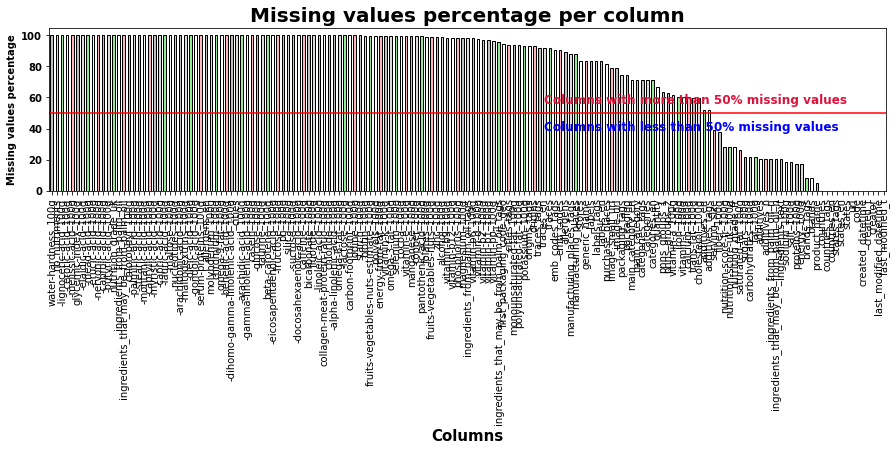

In [38]:
def msv1(data, thresh=20, color='black', edgecolor='black', width=15, height=3):
    """
    SOURCE: https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking
    """
    
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, 'Columns with more than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, 'Columns with less than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='blue',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage', weight='bold')
    plt.yticks(weight ='bold')
    
    return plt.show()

msv1(df,50, color=('silver', 'gainsboro', 'lightgreen', 'white', 'lightpink'))

On constate qu'il y a beaucoup de valeurs qui ne sont pas renseignées, dont près de 100% pour un grand nombre de colonnes. La gestion des valeurs manquantes va donc être un point crucial du projet. On verra au cas par cas après avoir déterminé quelles colonnes vont être conservées.

#### Vue individuelle

##### Par colonnes

Regardons les colonnes qui ne contiennent aucune valeur et que nous pourrons d'emblée ne pas traiter.

In [39]:
percentage=(df.isnull().mean())*100
print(percentage.sort_values())

last_modified_t                                 0.000000
last_modified_datetime                          0.000000
creator                                         0.000843
created_t                                       0.000843
created_datetime                                0.002809
code                                            0.007303
url                                             0.007303
states                                          0.014606
states_en                                       0.014606
states_tags                                     0.014606
countries_en                                    0.077241
countries_tags                                  0.077241
countries                                       0.077241
product_name                                    4.918728
brands                                          8.159494
brands_tags                                     8.165111
energy_100g                                    17.038034
proteins_100g                  

On peut voir précisément quelles colonnes ne contiennent jamais de valeur. On peut les éliminer directement :

- 'ingredients_that_may_be_from_palm_oil' 
- 'ingredients_from_palm_oil'          
- 'nutrition_grade_uk'               
- '-butyric-acid_100g'                  
- '-caproic-acid_100g'               
- '-nervonic-acid_100g'                   
- '-erucic-acid_100g'                       
- '-mead-acid_100g'                    
- '-elaidic-acid_100g'           
- 'glycemic-index_100g'              
- '-melissic-acid_100g'        
- '-cerotic-acid_100g' 
- '-lignoceric-acid_100g' 
- 'no_nutriments' 
- 'water-hardness_100g' 

Pour les autres colonnes, on pourra éventuellement s'en servir pour complèter des colonnes utiles.

##### Par lignes

Pour les lignes vides, on va prendre la dataframe sans les métadonnées (qui comme on l'a vu précédemment n'ont pas de valeur manquantes pour la date et l'horaire de dernière modification). Comme ça on pourra identifier le nombre de ligne ne présentant pas de valeurs utiles

In [40]:
# On extrait toutes les colonnes sauf la métadonnée
df2 = df[df.columns.difference(['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime'])]

print("Le nombre de lignes totalement vides est de :", df2.shape[0]-df2.dropna(how='all').shape[0])

Le nombre de lignes totalement vides est de : 0


On constate qu'il n'y a pas de lignes ne contenant aucune valeur. On n'aura pas à en supprimer directement

##### product_name

Il manque 4.9% de valeurs dans la colonne product_name. Cette valeur est indispensable. On peut voir si ajouter des valeurs provenant de generic_name est pertinent.  

In [41]:
print("Le nombre de lignes pour lequel generic_name est renseigné et product_name ne l'est pas est de :"
      , df.loc[df["generic_name"].notna() & df["product_name"].isna()].shape[0])

Le nombre de lignes pour lequel generic_name est renseigné et product_name ne l'est pas est de : 114


On pourra donc ajouter les valeurs de generic_name dans product_name quand product_name n'est pas renseigné. Ensuite, on pourra supprimer les lignes ne contenant pas de product_name qui ne seront pas exploitables.

##### brands

Il manque 8.15% de valeurs pour brands. Regardons si on peut les remplacer par brand_tags qui contient le nom des marques dans un autre format.

In [42]:
print("Le nombre de lignes pour lequel brand_tags est renseigné et brands ne l'est pas est de :"
      , df.loc[df["brands_tags"].notna() & df["brands"].isna()].shape[0])

Le nombre de lignes pour lequel brand_tags est renseigné et brands ne l'est pas est de : 2


In [43]:
df.loc[df["brands_tags"].notna() & df["brands"].isna()][["brands", "brands_tags"]]

,brands,brands_tags
268094,NaN,na
268096,NaN,na


En regardant les 2 lignes en question, on se rend compte que les valeurs dans brand_tags sont des chaines de caractères indiquant que la valeur n'est pas assignée. On ne remplacera donc pas brands par brands_tags dans le cas où brands est manquant. Les lignes ne contenant pas brands seront conservées, ce n'est pas une information indispensable.

#####  countries_en

C'est une information indispensable dans la mesure où on veut les produits disponibles en France. On ne gardera donc que les lignes qui contiennent cette valeur. Je vérifie qu'on ne peut pas remplacer les lignes manquantes grâce aux autres colonnes contenant des infos sur les pays. 

In [44]:
print("Le nombre de lignes pour lequel countries_en n'est pas renseigné et soit countries soit countries_tags l'est est de :"
      , df.loc[(df["countries"].notna() | df["countries_tags"].notna()) & df["countries_en"].isna()].shape[0])

Le nombre de lignes pour lequel countries_en n'est pas renseigné et soit countries soit countries_tags l'est est de : 0


On constate que les 3 colonnes relatives aux pays ont les mêmes valeurs (mais dans un format différent). On ne garde donc que countries_en qui contient ces noms dans une langue et un format uniforme ("France"). 

##### pnns_groups_1

Cette donnée peut être intéressante pour faire une recherche par catégorie et pour calculer le nutriscore qui dépend de si le produit est liquide ("Beverages") ou solide. On ajoutera les valeurs de pnns_groups_2 (qui est plus précis dans sa description) pour remplacer les valeurs manquantes lorsque c'est possible. 

##### ingredients_text

Cette colonne donne les ingrédients présents dans le produit, ce qui peut être intéressant pour l'utilisateur. 20% des données de cette colonne ne sont pas remplies. On ne va pas la modifier.


##### allergens et traces

Ces colonnes contiennent les allergenes présents et possiblement présents. Je pars de l'hypothèse que les lignes non renseignées correspondent aux produits sans allergenes. Je laisse donc les cellules vides sans les modifier. On peut regarder si la colonne allergens_en peut apporter des valeurs pour combler les vides de allergens, et si les colonnes traces_tags et traces_en peuvent combler les vides de traces.

In [45]:
print("Le nombre de lignes pour lequel allergens_en est renseigné et allergens ne l'est pas est de :"
      , df.loc[df["allergens_en"].notna() & df["allergens"].isna()].shape[0])
print("Le nombre de lignes pour lequel traces est renseigné et soit traces_en soit countries_tags ne l'est pas est de :"
      , df.loc[(df["traces_tags"].notna() | df["traces_en"].notna()) & df["traces"].isna()].shape[0])

Le nombre de lignes pour lequel allergens_en est renseigné et allergens ne l'est pas est de : 0
Le nombre de lignes pour lequel traces est renseigné et soit traces_en soit countries_tags ne l'est pas est de : 0


Il n'y a pas d'intérêt à tenter de combler les vides de ces 2 colonnes avec les autres colonnes à disposition.

##### additives_en

On utilise additives_en pour avoir la liste des additifs présents dans le produit. La colonne additives renvoie une liste, probablement d'ingrédients, on ne va donc pas l'utiliser. On regarde si on peut completer les valeurs manquantes grâce à la colonne additives_tags. 

In [46]:
print("Le nombre de lignes pour lequel additives_tags est renseigné et additives_en ne l'est pas est de :"
      , df.loc[(df["additives_tags"].notna()) & df["additives_en"].isna()].shape[0])

Le nombre de lignes pour lequel additives_tags est renseigné et additives_en ne l'est pas est de : 0


On laissera donc les valeurs non renseignées vides.

##### ingredients_from_palm_oil_n

Cette colonne nous donne combien d'ingrédients du produit contiennent de l'huile de palme. On va comparer le remplissage de cette colonne et de la colonne des produits qui peuvent contenir de l'huile de palme. 

In [47]:
print("Le nombre de lignes pour lequel ingredients_that_may_be_from_palm_oil_n est renseigné et ingredients_from_palm_oil_n ne l'est pas est de :"
      , df.loc[(df["ingredients_that_may_be_from_palm_oil_n"].notna()) & df["ingredients_from_palm_oil_n"].isna()].shape[0])

Le nombre de lignes pour lequel ingredients_that_may_be_from_palm_oil_n est renseigné et ingredients_from_palm_oil_n ne l'est pas est de : 0


Je ne peux pas m'aider d'autres colonnes pour remplir les cases manquantes. Les autres colonnes traitant de l'huile de palme sont vides. Je ne vais donc pas modifier ma colonne.

##### nutrition_grade_fr

Le nutriscore donne le rang nutritionnel de notre produit. On peut le déduire de nutrition_score_fr_100g. On peut également éventuellement le prélever de la colonne nutrition_grade_uk. 

In [48]:
print("Le nombre de lignes pour lequel nutrition_grade_uk est renseigné et nutrition_grade_fr ne l'est pas est de :"
      , df.loc[(df["nutrition_grade_uk"].notna()) & df["nutrition_grade_fr"].isna()].shape[0])

Le nombre de lignes pour lequel nutrition_grade_uk est renseigné et nutrition_grade_fr ne l'est pas est de : 0


On constate que nutrition_grade_uk n'apporte pas d'information supplémentaire. En effet, cette colonne est vide. On déduira donc nos données depuis celles de nutrition_score_fr_100g après avoir effectué des modifications sur la colonne en question.

##### energy_100g, fat_100g, saturated-fat_100g, carbohydrates_100g, sugars_100g, fiber_100g, salt_100g, proteins_100g, fruits-vegetables-nuts_100g, vitamin-d_100g, vitamin-c_100g, calcium_100g, iron_100g

Pour chacune de ces valeurs nutritionnelles, on va vérifier que chaque cellule ne dépasse pas 100 grammes ou n'est pas négative ce qui serait une valeur aberrante et on supprimera la ligne en question (sauf pour energy_100g où on mettera un seuil différent: 8000 kJ par exemple qui semble être assez large pour ne pas supprimer de valeurs correctes). 

On peut également faire des vérifications supplémentaires, on peut vérifier que la valeur sugars_100g est bien supérieur à la somme des valeurs de 'glucose_100g', 'sucrose_100g', 'fructose_100g', 'maltose_100g' qui correspond à différents types de sucres. Cependant, les colonnes en question sont presques vides, il n'est donc pas pertinent d'effectuer cette opération.

Pour salt et sodium, on peut diviser la valeur du sel par 2.54 pour obtenir celle du sodium. On peut donc ne garder qu'une seule de ces colonnes qui sont potentiellement redondantes

On remplacera toutes les valeurs non renseignées par 0 en considérant que si ça n'a pas été renseigné, c'est que la valeur est nulle. 

In [49]:
print("Le nombre de lignes pour lequel sodium_100g est renseigné et salt_100g ne l'est pas est de :"
      , df.loc[df["sodium_100g"].notna() & df["salt_100g"].isna()].shape[0])

Le nombre de lignes pour lequel sodium_100g est renseigné et salt_100g ne l'est pas est de : 0


Je choisis de garder la colonne salt_100g qui est plus parlante pour l'utilisateur final. 

##### nutrition-score-fr_100g

Le score de nutrition est une valeur indispensable. Pour le remplir, il y a plusieurs options. Commençons déjà par vérifier qu'on ne peut rien extraire du nutrition-score-uk_100g.

In [50]:
print("Le nombre de lignes pour lequel nutrition-score-uk_100g est renseigné et nutrition-score-fr_100g ne l'est pas est de :"
      , df.loc[df["nutrition-score-uk_100g"].notna() & df["nutrition-score-fr_100g"].isna()].shape[0])

Le nombre de lignes pour lequel nutrition-score-uk_100g est renseigné et nutrition-score-fr_100g ne l'est pas est de : 0


On ne peut donc pas modifier notre colonne de cette façon. 
On peut également obtenir le nutriscore en le calculant à partir de energy_100g, saturated-fat_100g, sugars_100g, sodium_100g, proteins_100g, fruits-vegetables-nuts_100g, pnns_groupe_1. 

##### image_url

On garde l'image pour pouvoir l'associer au produit quand l'utilisateur fera sa recherche. On regarde si l'autre colonne contenant des images pourrait permettre de remplir les données vides.

In [51]:
print("Le nombre de lignes pour lequel image_small_url est renseigné et image_url ne l'est pas est de :"
      , df.loc[df["image_small_url"].notna() & df["image_url"].isna()].shape[0])

Le nombre de lignes pour lequel image_small_url est renseigné et image_url ne l'est pas est de : 0


On ne modifie donc pas la colonne image_url au niveau des valeurs manquantes. 

### Données retenues

Données finales : 
'product_name', 'brands', 'countries_en', 'pnns_groups_1', 'ingredients_text', 'allergens', 'traces', 'additives_en', 'ingredients_from_palm_oil_n','nutrition_grade_fr', 'energy_100g', 'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'salt_100g', 'fat_100g', 'carbohydrates_100g', 'proteins_100g', 'nutrition-score-fr_100g', 'fruits-vegetables-nuts_100g', 'vitamin-d_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g', 'image_url'

Données temporaires pour remplissage qui seront supprimées de notre table à la fin du nettoyage : 
'generic_name', 'pnns_groups_2'